Coefficients:[   0.           -0.          442.67992538    0.            0.            0.
   -0.            0.          330.76014648    0.        ], intercept 152.52
Residual sum of squares: 3583.42
Score: 0.28


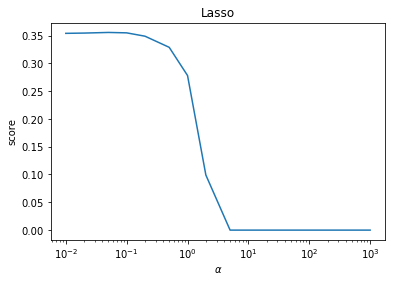

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cross_validation
def load_data():
    '''
    加载用于回归问题的数据集

    :return: 一个元组，用于回归问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    diabetes = datasets.load_diabetes()#使用 scikit-learn 自带的一个糖尿病病人的数据集
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
		test_size=0.25,random_state=0) # 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
def test_Lasso(*data):
    '''
    测试 Lasso 的用法

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr = linear_model.Lasso()
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, y_test))
def test_Lasso_alpha(*data):
    '''
    测试 Lasso 的预测性能随 alpha 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr = linear_model.Lasso(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    plt.show()
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data() # 产生用于回归问题的数据集
    test_Lasso(X_train,X_test,y_train,y_test) # 调用 test_Lasso
    test_Lasso_alpha(X_train,X_test,y_train,y_test) # 调用 test_Lasso_alpha